In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from subprocess import check_output
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings                                                                 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [5]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
data.shape

(18249, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### There is no missing data in this dataset.

## Categorical columns:
- Date
- type
- region

In [9]:
data.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2015-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Philadelphia
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


<AxesSubplot:xlabel='type', ylabel='count'>

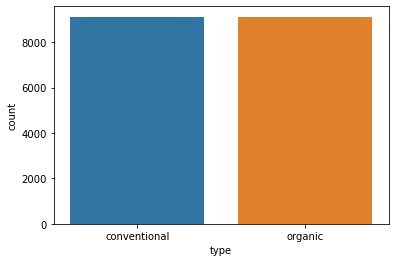

In [10]:
sns.countplot(x='type',data=data)

Philadelphia           338
TotalUS                338
SouthCarolina          338
PhoenixTucson          338
BaltimoreWashington    338
BuffaloRochester       338
Columbus               338
Syracuse               338
SanFrancisco           338
GrandRapids            338
Charlotte              338
Louisville             338
HarrisburgScranton     338
Tampa                  338
Nashville              338
RaleighGreensboro      338
CincinnatiDayton       338
Spokane                338
Atlanta                338
Plains                 338
NewOrleansMobile       338
Jacksonville           338
Chicago                338
Detroit                338
HartfordSpringfield    338
NewYork                338
Indianapolis           338
Seattle                338
West                   338
Houston                338
Boise                  338
SanDiego               338
LosAngeles             338
LasVegas               338
MiamiFtLauderdale      338
Midsouth               338
DallasFtWorth          338
S

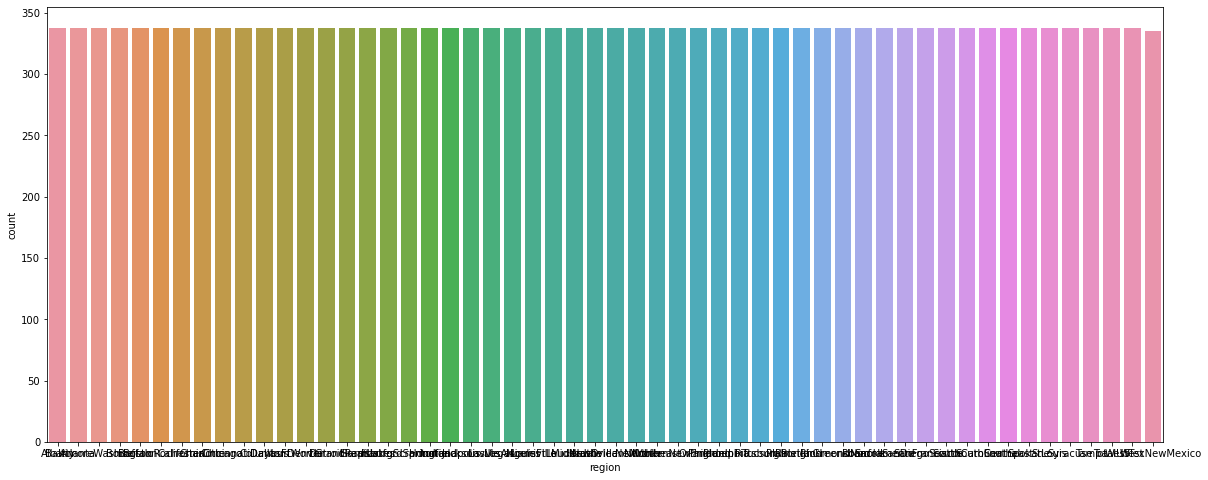

In [11]:
plt.figure(figsize=(20,8))
sns.countplot(x='region',data=data)
data['region'].value_counts()

In [12]:
data['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

## Avocado vs Avg.Price

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

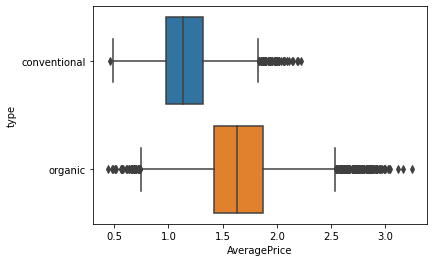

In [13]:
sns.boxplot(x='AveragePrice',y='type',data=data)

In [14]:
enc=LabelEncoder()
data['type']=enc.fit_transform(data['type'])

In [15]:
data['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [16]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [17]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

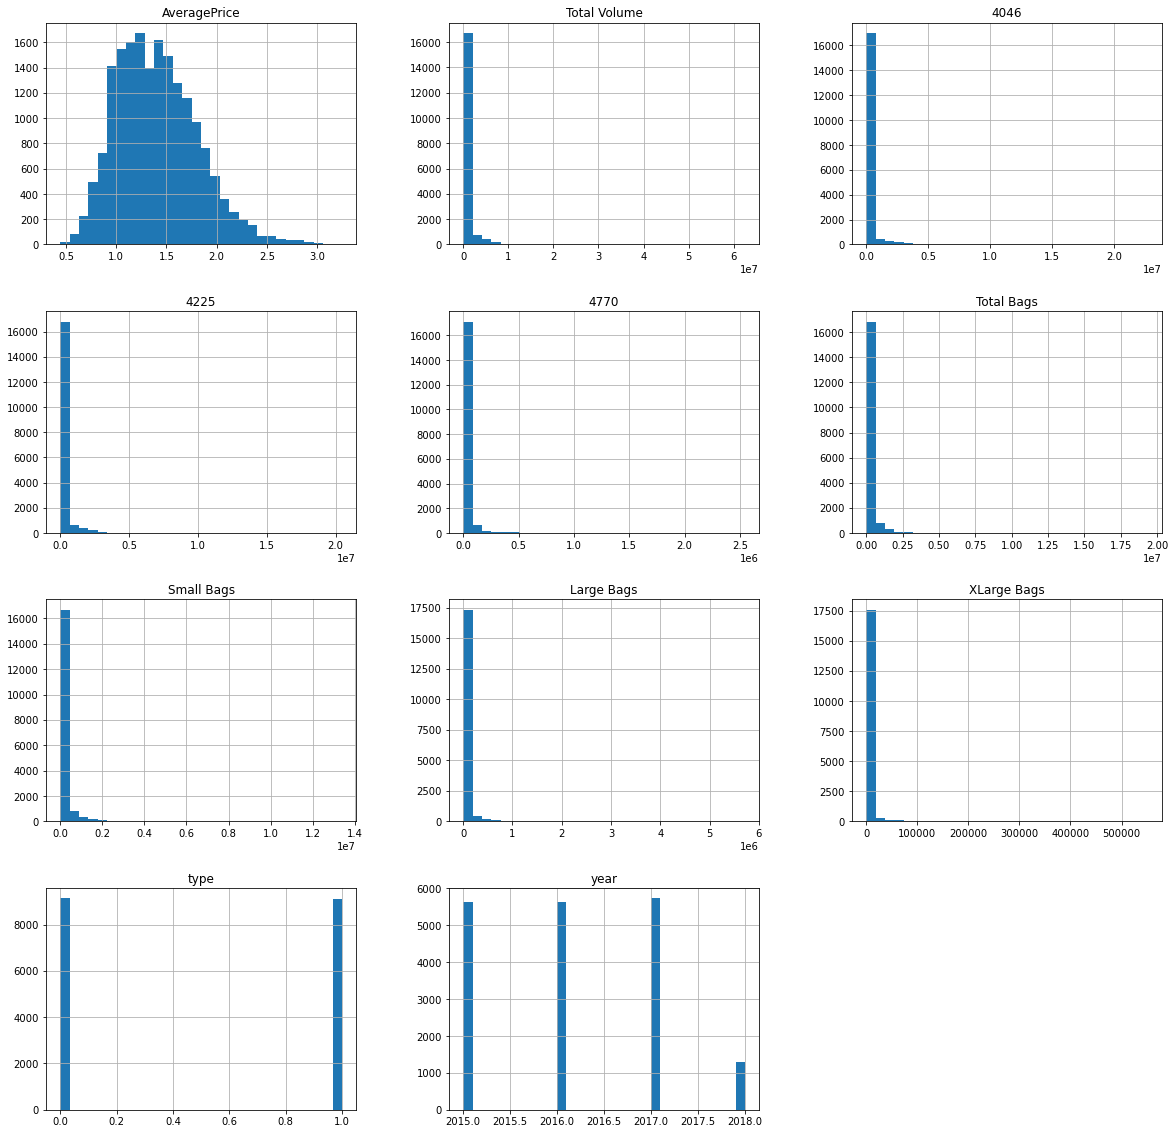

In [18]:
data.hist(figsize=(20,20),grid=True,bins=30)

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
type            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

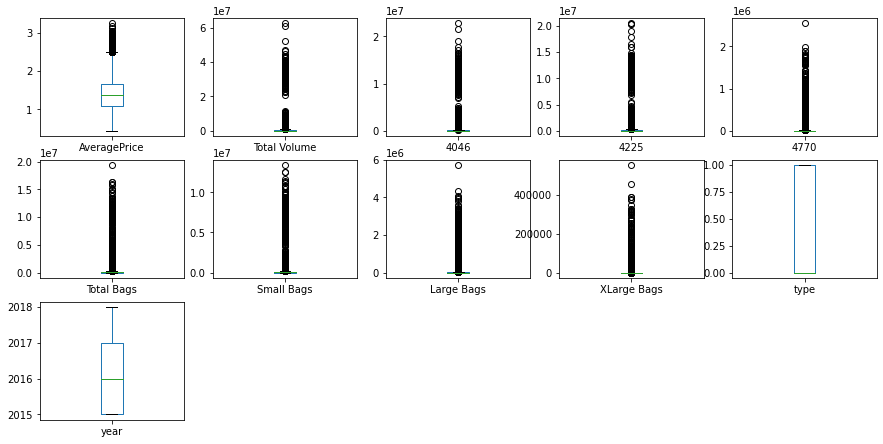

In [19]:
data.plot(kind="box",subplots=True,layout=(4,5),figsize=(15,10))

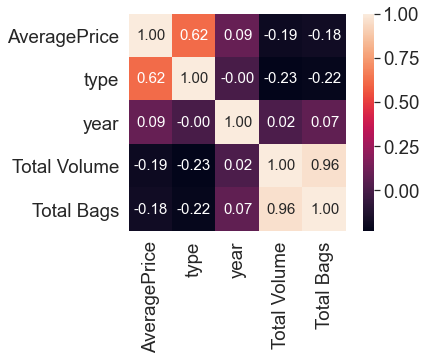

In [20]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

- we can see that there is a strong relation between Total Voume and Total Bags
- And AveregePrice and Type
- Other than that have a weak relationship

## Total Volume Vs. small,large,Xlarge

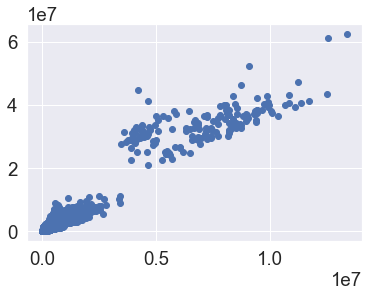

In [21]:
plt.plot(data['Small Bags'],data['Total Volume'],'bo')

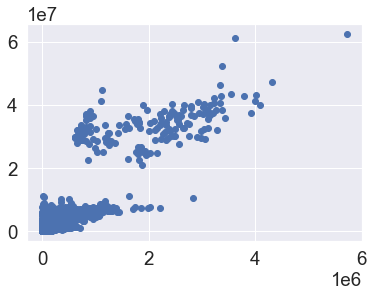

In [22]:
plt.plot(data['Large Bags'],data['Total Volume'],'bo')

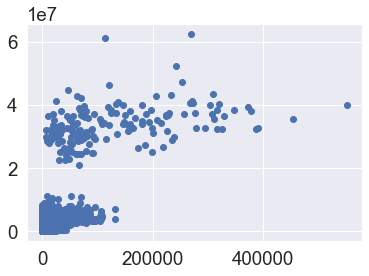

In [23]:
plt.plot(data['XLarge Bags'],data['Total Volume'],'bo')

## Total Bags Vs. Small Bags, Large Bags, XLarge Bags

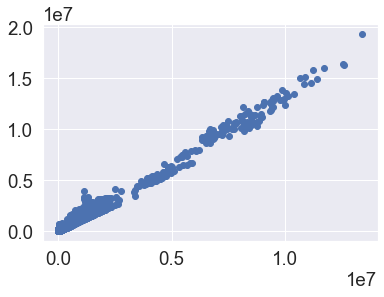

In [24]:
plt.plot(data['Small Bags'],data['Total Bags'],'bo')

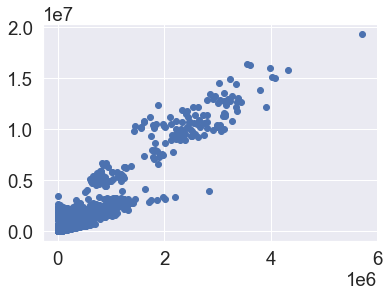

In [25]:
plt.plot(data['Large Bags'],data['Total Bags'],'bo')

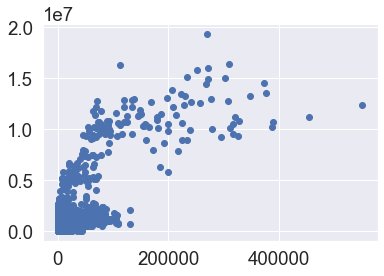

In [26]:
plt.plot(data['XLarge Bags'],data['Total Bags'],'bo')

## we can see that there is strong relation between Total bags and Small bags

## Region Vs. Year Distribution

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

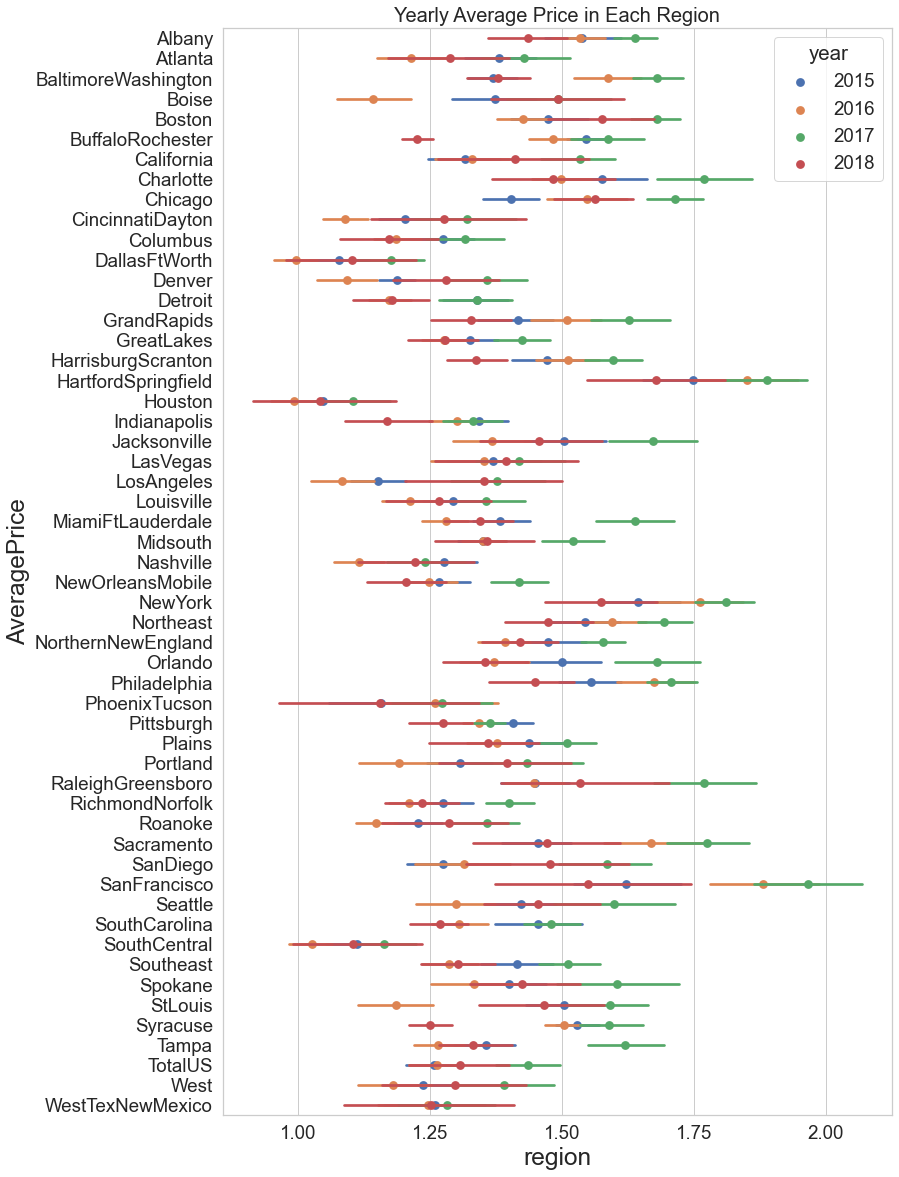

In [27]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=data, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

## Region vs. Average price distribution

Text(0.5, 1.0, 'Type Average Price in Each Region')

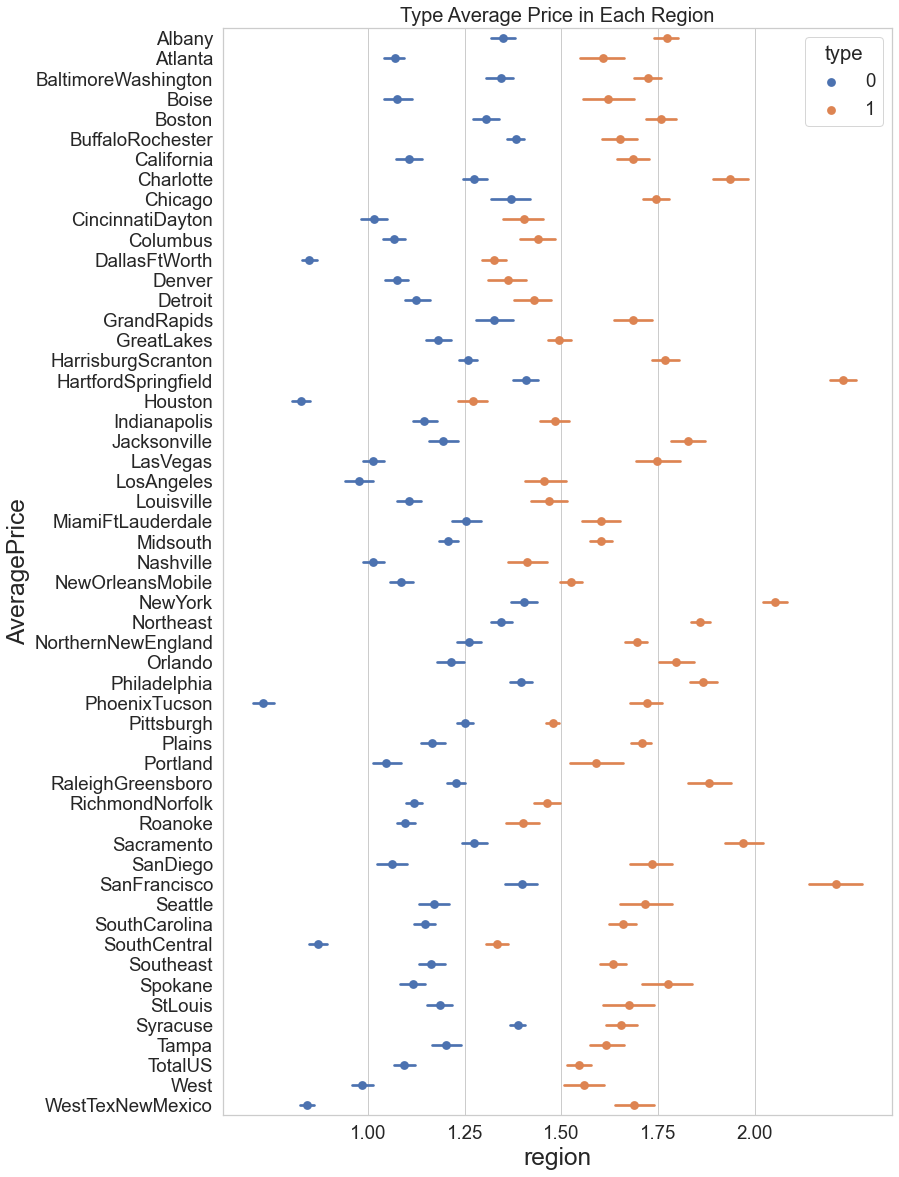

In [28]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=data, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

In [29]:
X=data[['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags']] #feature columns
y=data.type

In [30]:
y

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32

In [31]:
X

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0
...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0


## we can see that the outcome is in binary value so we can use classification method

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 7)
Y Train Shape  (14599,)
X Test Shape  (3650, 7)
Y Test Shape  (3650,)


Accuracy score for Logistic Regression test data is: 0.9402739726027397
----------------------------------------------------------------------------------------
Confusion matrix for logistic regression model
              Predicted organic  Predicted Conventional
organic                    1664                     184
Conventional                 34                    1768
----------------------------------------------------------------------------------------


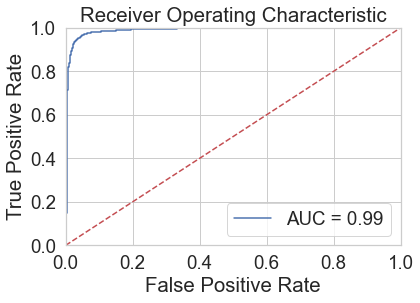

In [33]:
#Logistic Regression model
lr= LogisticRegression()
lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train)  
y_pred_test = lr.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for logistic regression model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Using RandomForestClassifier

Accuracy score for test data using Random Forest : 0.996986301369863
----------------------------------------------------------------------------------------
Confusion matrix for Random forest model
              Predicted organic  Predicted Conventional
organic                    1841                       7
Conventional                  4                    1798
----------------------------------------------------------------------------------------


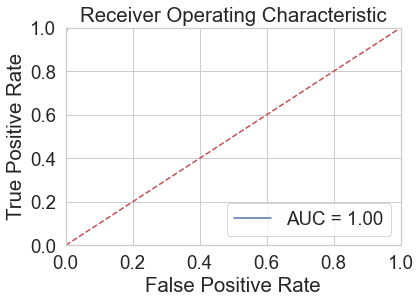

In [34]:
#Randomforest classifier
rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

print('----------------------------------------------------------------------------------------')

#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['organic','Conventional']
confusion_matrix.columns = ['Predicted organic','Predicted Conventional']
print("Confusion matrix for Random forest model")
print(confusion_matrix)

print('----------------------------------------------------------------------------------------')

#AUC ROC Curve
probs = rfclass.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Predicting Avgerage price of Avocado

In [35]:
data.drop(['Date', 'Total Volume', 'Total Bags', 'region', 'year'], axis = 1,inplace = True)

In [36]:
data.columns

Index(['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags',
       'XLarge Bags', 'type'],
      dtype='object')

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data_avocado_scaler = scaler.transform(data)
data_avocado = pd.DataFrame(data_avocado_scaler)
data_avocado.columns = ['AveragePrice', '4046', '4225', '4770', 'SmallBags', 'LargeBags', 'XLargeBags', 'type']
data_avocado.head()

,AveragePrice,4046,4225,4770,SmallBags,LargeBags,XLargeBags,type
0,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836
1,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836
2,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836
3,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836
4,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836


In [38]:
feature_cols = ['4046', '4225', '4770', 'SmallBags', 'LargeBags', 'XLargeBags', 'type']
X = data_avocado[feature_cols]
y=data_avocado.AveragePrice

In [39]:
X

,4046,4225,4770,SmallBags,LargeBags,XLargeBags,type
0,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836
1,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836
2,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836
3,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836
4,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836
...,...,...,...,...,...,...,...
18244,-0.230017,-0.243857,-0.212540,-0.226665,-0.220964,-0.17558,1.000164
18245,-0.230693,-0.242277,-0.212540,-0.232196,-0.221403,-0.17558,1.000164
18246,-0.230693,-0.243090,-0.205766,-0.231644,-0.222561,-0.17558,1.000164
18247,-0.230428,-0.242651,-0.205774,-0.229543,-0.222529,-0.17558,1.000164


In [40]:
y

0       -0.188689
1       -0.139020
2       -1.182069
3       -0.809551
4       -0.312861
           ...   
18244    0.556347
18245    0.755023
18246    1.152375
18247    1.301382
18248    0.531512
Name: AveragePrice, Length: 18249, dtype: float64

# Now Here outcome is in countinous data so we use linear regression model for predict Average Price

In [41]:
def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [42]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 7)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 7)
y_test shape:  (3650,)


In [43]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [44]:
linreg = linear_reg(X,y)

In [45]:
linreg.score(X,y)

0.3980206520577072

In [46]:
print('Intercept:',linreg.intercept_)   
intercept=linreg.intercept_
print('Coefficients:',linreg.coef_)

Intercept: -0.0025057119702502732
Coefficients: [-0.31332629  0.32039105 -0.12354322  0.06163263 -0.07300029  0.07633143
  0.60580356]


In [47]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

In [48]:
eq1 = zip(X, coef)

for c1,c2 in eq1:
    print(c1,c2)

4046 -0.0025057119702502732
4225 -0.3133262880926919
4770 0.3203910517486833
SmallBags -0.12354321842178159
LargeBags 0.061632627690363206
XLargeBags -0.07300028791378115
type 0.07633142768206083


In [49]:
y_pred_train = linreg.predict(X_train)

In [50]:
y_pred_test = linreg.predict(X_test)

## Calculating Mean Absolute error, Mean Squared error, Root Mean Squared error

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.5940526287383294
MAE for test set is 0.5974131265484528
----------------------------------------------------------------------------------------
MSE for training set is 0.6023479204673671
MSE for test set is 0.6005051588207693
----------------------------------------------------------------------------------------
RMSE for training set is 0.7761107655917209
RMSE for test set is 0.7749226792530783


In [52]:
print("Model Evaluation for Linear Regression Model")

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Linear Regression Model
----------------------------------------------------------------------------------------
r_squared for train data  0.397386293900034  and adjusted_r_squared for train data 0.3970971913064695
----------------------------------------------------------------------------------------
r_squared for test data  0.4005468712569106  and adjusted_r_squared for test data 0.39939470983428516


## Using RandomForest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

In [54]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

print('----------------------------------------------------------------------------------------')

yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Model Evaluation for Random Forest Regressor 
RMSE for training set is 0.17909132821333085  and RMSE for test set is 0.45820263400726197
----------------------------------------------------------------------------------------
r_squared for train data  0.9679121436575878  and adjusted_r_squared for train data 0.9678967495794303
----------------------------------------------------------------------------------------
r_squared for test data  0.7904181587668733  and adjusted_r_squared for test data 0.7900153380945416


# Conclusion

Columns like Type of avocado, size and bags have impact on Average Price, lesser the RMSE value accurate the model is, when we consider Small Hass in Small Bags.
Random forest Classifier has more accuracy than Logistic regression model for this dataset , accuracy is 0.99 it may also denote it is overfitting as it even classifies the outliers perfectly.
Random forest classifier model predicts the type of Avocado more accurately than Logistic regression model.
Random Forest Regressor model predicts the average price more accurately than linear regression model.